In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import glob
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
from copy import deepcopy

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
#loading raw ukbms data
site_indices = pd.read_csv('ukbms2020csv/ukbmssiteindices2020.csv',encoding='cp1252')

In [3]:
#loading combined site indices and climate data, combined using 'nearest' method of selection see climate_variables.py
indices_climate = pd.read_csv('/Users/Louisa/Desktop/site_climate.csv')

#dropping the first column -> previous index
indices_climate.drop(columns=indices_climate.columns[0], axis=1, inplace=True)
# indices_climate.head

In [4]:
#raw climatic variables
airtemp_filenames = glob.glob('/Users/Louisa/Desktop/MScProject/HADUKAnnual (1973-2020)/annual mean air temp/*.nc')
rainfall_filenames = glob.glob('/Users/Louisa/Desktop/MScProject/HADUKAnnual (1973-2020)/annual rainfall/*.nc')
humidity_filenames = glob.glob('/Users/Louisa/Desktop/MScProject/HADUKAnnual (1973-2020)/relative humidity/*.nc')
sunshine_filenames = glob.glob('/Users/Louisa/Desktop/MScProject/HADUKAnnual (1973-2020)/sunshine hours/*.nc')
airtemp_dat = xr.open_mfdataset(airtemp_filenames)
rainfall_dat = xr.open_mfdataset(rainfall_filenames)
humidity_dat = xr.open_mfdataset(humidity_filenames)
sunshine_dat = xr.open_mfdataset(sunshine_filenames)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xarray/backends/plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


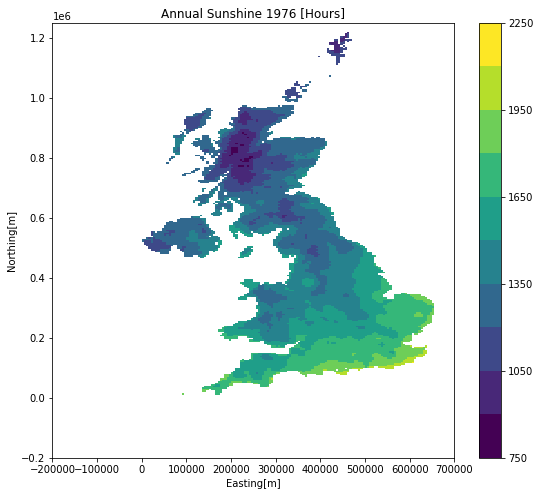

In [5]:
#sun 1976
plt.figure(figsize=[9,8])
sunplt1976 = sunshine_dat['sun'].sel(time='1976')
sunplt1976.plot(add_labels=False, levels= 10) #removing xarray labels
plt.title('Annual Sunshine 1976 [Hours]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Sunshine 1976.png')

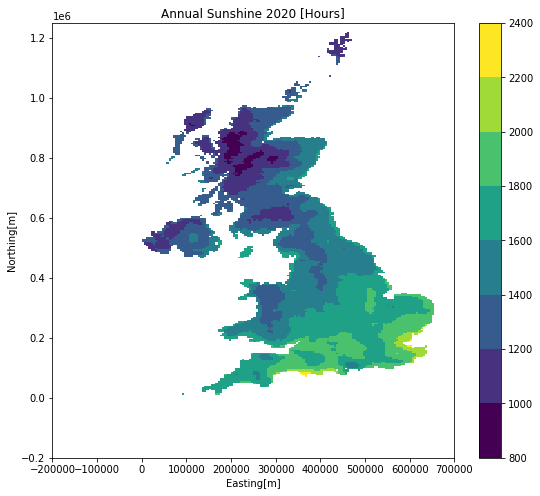

In [6]:
#sun 2020 
plt.figure(figsize=[9,8])
sunplt2020 = sunshine_dat['sun'].sel(time='2020')
sunplt2020.plot(add_labels=False, levels = 10)
plt.title('Annual Sunshine 2020 [Hours]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Sunshine 2020.png')

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

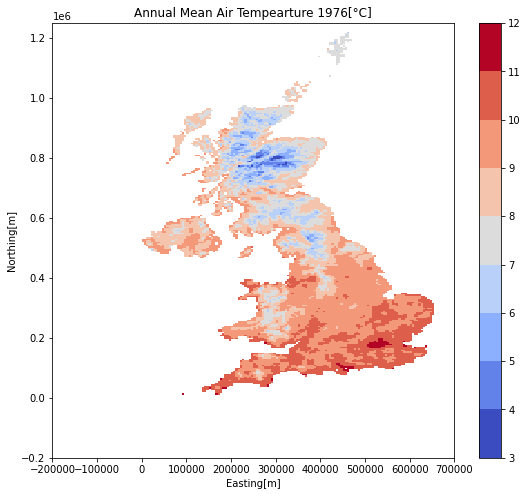

In [7]:
#mean airtemp 1976
plt.figure(figsize=[9,8])
airplt1976 = airtemp_dat['tas'].sel(time='1976')
# color1= '#89CFF0'
# color2 = '#FF6E00'
airplt1976.plot(add_labels=False, levels = 10, cmap='coolwarm') #removing xarray labels, changing colours
plt.title('Annual Mean Air Tempearture 1976[°C]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Air 1976.png')

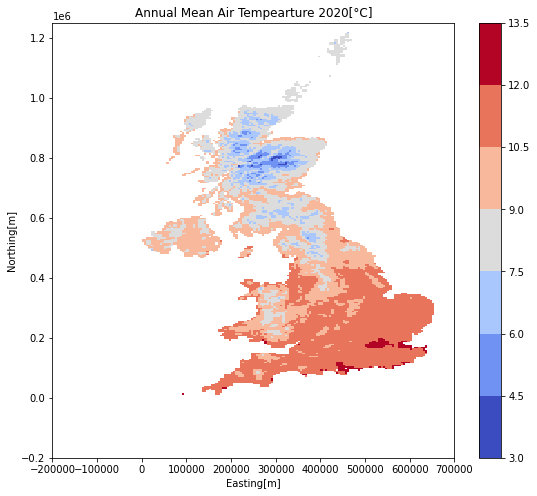

In [8]:
#mean airtemp 2020
plt.figure(figsize=[9,8])
airplt1976 = airtemp_dat['tas'].sel(time='2020')
airplt1976.plot(add_labels=False, levels = 10, cmap='coolwarm') #removing xarray labels, changing colours for purpose
plt.title('Annual Mean Air Tempearture 2020[°C]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Air 2020.png')

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

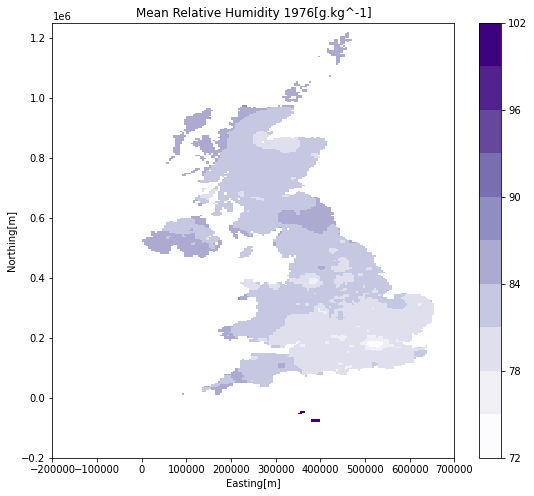

In [9]:
#annual relative humidity 1976
plt.figure(figsize=[9,8])
humidplt1976 = humidity_dat['hurs'].sel(time='1976')
# color1= '#89CFF0'
# color2 = '#FF6E00'
humidplt1976.plot(add_labels=False, levels = 10, cmap='Purples') #removing xarray labels, changing colours
plt.title('Mean Relative Humidity 1976[g.kg^-1]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Humidity 1976.png')

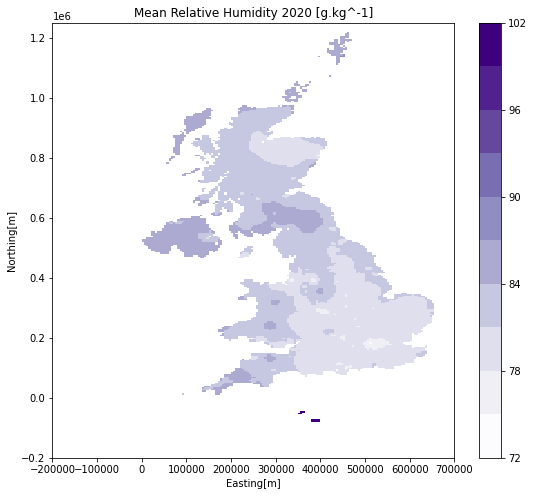

In [10]:
plt.figure(figsize=[9,8])
humidplt2020 = humidity_dat['hurs'].sel(time='2020')
humidplt2020.plot(add_labels=False, levels = 10, cmap='Purples') #removing xarray labels, changing colours
plt.title('Mean Relative Humidity 2020 [g.kg^-1]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Humidity 2020.png')

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 3:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

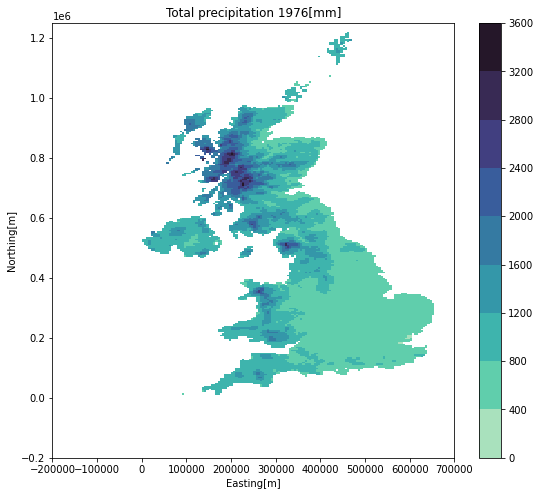

In [11]:
plt.figure(figsize=[9,8])
rainplt1976 = rainfall_dat['rainfall'].sel(time='1976')
# color1= '#89CFF0'
# color2 = '#FF6E00'
rainplt1976.plot(add_labels=False, levels = 10, cmap='mako_r') #removing xarray labels, changing colours
plt.title('Total precipitation 1976[mm]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Rainfall 1976.png')

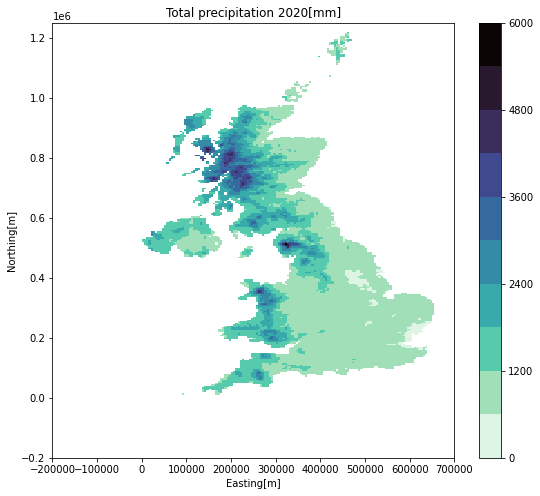

In [12]:
plt.figure(figsize=[9,8])
rainplt2020 = rainfall_dat['rainfall'].sel(time='2020')
# color1= '#89CFF0'
# color2 = '#FF6E00'
rainplt2020.plot(add_labels=False, levels = 10, cmap='mako_r') #removing xarray labels, changing colours
plt.title('Total precipitation 2020[mm]')
plt.xlabel('Easting[m]')
plt.ylabel('Northing[m]')
plt.savefig('figures/Rainfall 2020.png')

In [13]:
#creating dataframe consisting of climatic variables, total site index, species richness for each site each year
df1 = indices_climate.groupby(by = ['Site Number', 'YEAR'])['SPECIES CODE'].count().reset_index()
df2 = indices_climate.groupby(by = ['Site Number', 'YEAR'])['SITE INDEX'].sum().reset_index()

df2 = df1.merge(df2)
df2.rename(columns={'SPECIES CODE':'SPECIES RICHNESS', 'SITE INDEX':'TOTAL SITE INDEX'}, inplace=True)

# print(df2.shape)
# print(df2)
df1 = indices_climate.merge(df2)
# print(df1)

In [14]:
def calculate_simpson_diversity(df,sitenum,year):
    '''Calculates simpson's diversity index for a site in a specified year'''
    df1 = df[(df['YEAR'] == year) & (df['Site Number'] == sitenum)].copy()
    df1.reset_index(inplace=True)
    nlist = []
    for i in df1.index:
        x = df1['SITE INDEX'][i]
        nlist.append((x-1)*x)
    total = df1['TOTAL SITE INDEX'][0]
    totalb = total*(total-1)
    totala = sum(nlist)
    D = 1 - (totala/totalb)
    return D


In [15]:
# df3 = deepcopy(df1)
# df3['Simpsons Index']= df3.apply(lambda row: calculate_simpson_diversity(df3, row['Site Number'], row['YEAR']), axis = 1)
#df3.tocsv(siteindices_biodiver)

In [16]:
# Merging dataframe with simpsons indices to per site per year data, savign as csv for future use

# bio_clim =pd.merge(df2, df3, how='left', left_on=['Site Number','YEAR'], right_on=['Site Number','YEAR'])
# bio_clim.drop_duplicates(keep='first',inplace=True) #dropping duplicate rows
# bio_clim.reset_index(inplace=True) #resetting index
# bio_clim.drop(columns=bio_clim.columns[0], axis=1, inplace=True) #dropping extra index column
# # bio_clim.to_csv('bioD_clim_site_year')
bio_clim = pd.read_csv('bioD_clim_site_year') #loading csv created above


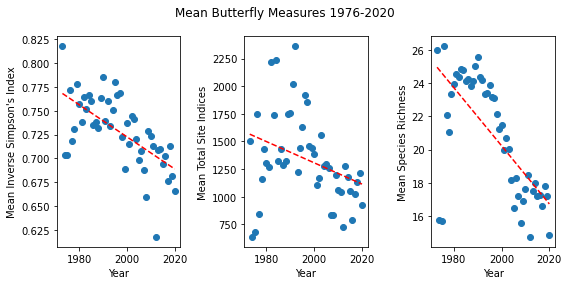

In [17]:
avgs = bio_clim.groupby('YEAR').mean().reset_index()
avgs.drop(['Easting','Northing','sun','average temp','rainfall','relative humidity'], inplace=True, axis=1)

fig,axes =plt.subplots(ncols=3,figsize=(8,4))
axes[0].scatter(avgs['YEAR'],avgs['Simpsons Index'])
axes[1].scatter(avgs['YEAR'],avgs['TOTAL SITE INDEX'])
axes[2].scatter(avgs['YEAR'],avgs['SPECIES RICHNESS'])

z1 = np.polyfit(avgs['YEAR'],avgs['Simpsons Index'],1)
p1 = np.poly1d(z1)
axes[0].plot(avgs['YEAR'],p1(avgs['YEAR']),'r--')

z2 = np.polyfit(avgs['YEAR'],avgs['TOTAL SITE INDEX'],1)
p2 = np.poly1d(z2)
axes[1].plot(avgs['YEAR'],p2(avgs['YEAR']),'r--')

z3 = np.polyfit(avgs['YEAR'],avgs['SPECIES RICHNESS'],1)
p3 = np.poly1d(z3)
axes[2].plot(avgs['YEAR'],p3(avgs['YEAR']),'r--')

axes[0].set(ylabel="Mean Inverse Simpson's Index",xlabel='Year')
axes[1].set(ylabel='Mean Total Site Indices',xlabel='Year')
axes[2].set(ylabel='Mean Species Richness',xlabel='Year')
fig.suptitle('Mean Butterfly Measures 1976-2020')
fig.tight_layout()
fig.savefig('figures/Mean Measures.png')

In [18]:
bio_clim.dropna(inplace=True)
bio_clim.drop(bio_clim.columns[0],axis =1, inplace=True)
bio_clim['Diversity'] = np.select([bio_clim['Simpsons Index'] >= 0.66, bio_clim['Simpsons Index'] <= 0.33],['High','Low'],default='Medium') #categorising sites in each year into 'low/medium/high' diversity 

In [19]:
site_location = pd.read_csv('final_ukbmssitelocationdata2020.csv',encoding='cp1252')
bio_clim_latlong =pd.merge(bio_clim, site_location[['Site Number','latitude','longitude']], how='left', left_on=['Site Number'], right_on=['Site Number']) #adding site location latitude and longitude to final dataset
# bio_clim_latlong.to_csv('BioD_year_site_latlong.csv')